

<font color=darkblue>
    
 Predicting credit card users churn. Task is to help a bank predict who is likely to cancel their credit card by building and evaluating a classification model.



1. Exploratory Data Analysis (EDA)
2. Data Preparation
3. Model Building
4. Performance Evaluation
5. Model Selection



## Data Discovery

### Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sklearn
print(sklearn.__version__)


1.3.0


In [ ]:
conda install -c anaconda scikit-learn


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Loading Data

In [ ]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000


In [ ]:
churn = pd.read_csv("BankChurners.csv")

In [ ]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### Data Overview

In [ ]:
# let's create a copy of the data
data = churn.copy()

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

- Education_Level has 15% missing values
- Marital_Status has 7% missing values

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

### Data Pre-Processing

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [ ]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,1,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000


## EDA

### Customer_Age Distribution

Create a boxplot stacked on top of a density distribution plot for 'Customer_Age.'

In [ ]:
#Creating numerical columns
num_cols=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

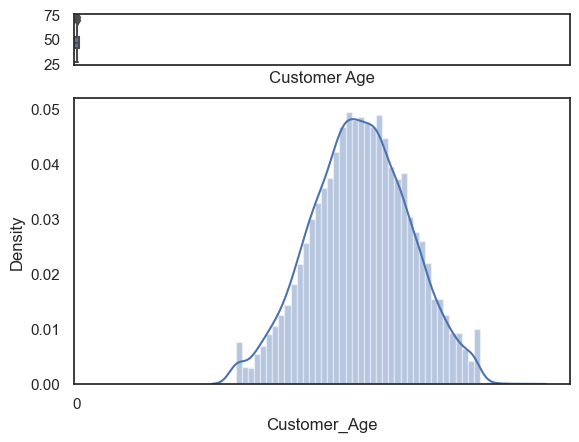

In [ ]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Customer_Age"], ax=ax_box)
sns.distplot(data["Customer_Age"], ax=ax_hist)
ax_box.set(xlabel='Customer Age')
plt.show()

In [ ]:
#The lower quartile (Q1) is 42 years, indicating that 25% of people are younger than this age.
#The upper quartile (Q3) is 52 years, signifying that 75% of people are younger than this age, with an outlier at 68 years.
#The data is concentrated around 44 years, primarily falling within the 45-50 age range

### Credit_Limit Distribution
Create a boxplot stacked on top of a density distribution plot for 'Credit_Limit.' Comment on what this chart indicates.

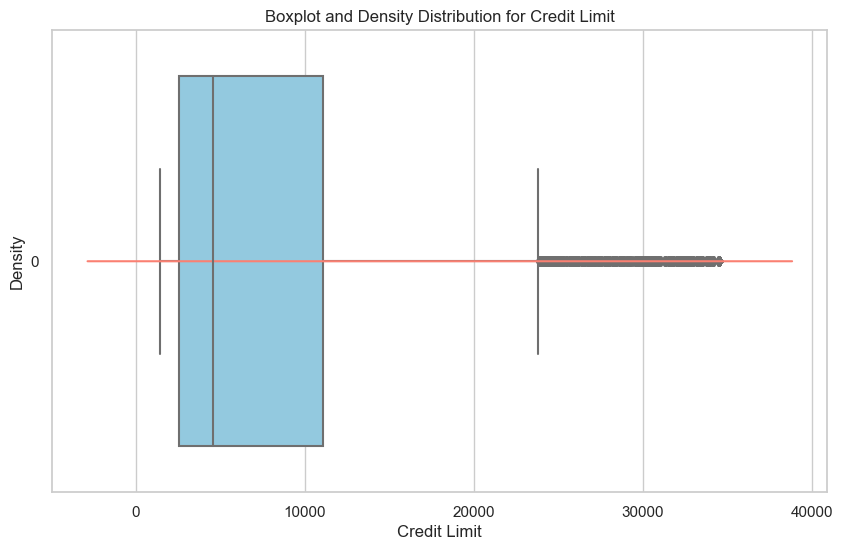

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot and a density distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data["Credit_Limit"], color="skyblue", orient="h")
sns.kdeplot(data["Credit_Limit"], color="salmon")

# Add labels and title
plt.xlabel('Credit Limit')
plt.title('Boxplot and Density Distribution for Credit Limit')

# Show the plot
plt.show()


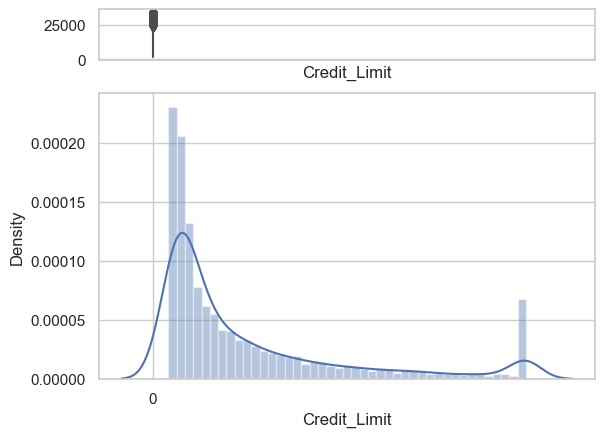

In [ ]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Credit_Limit"], ax=ax_box)
sns.distplot(data["Credit_Limit"], ax=ax_hist)
ax_box.set(xlabel='Credit_Limit')
plt.show()

In [ ]:
#The lower quartile (Q1) is 2500, indicating that 25% of individuals have credit limits below this amount.
#The upper quartile (Q3) is 11000, signifying that 75% of people have credit limits below this value, with an outlier at 24000.
#The data is concentrated around 2500, falling primarily within the 2500-3500 range

###  Total_Trans_Ct Distribution
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Ct.' Comment on what this chart indicates.

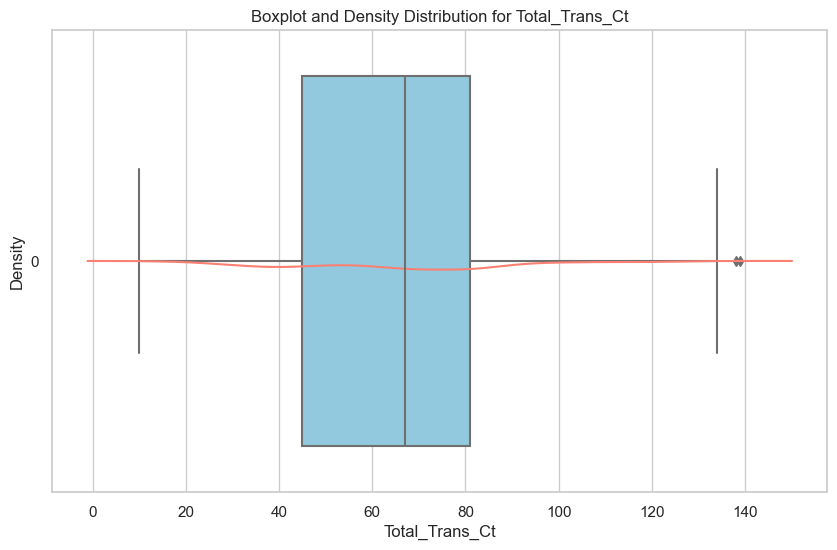

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot and a density distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data["Total_Trans_Ct"], color="skyblue", orient="h")
sns.kdeplot(data["Total_Trans_Ct"], color="salmon")

# Add labels and title
plt.xlabel('Total_Trans_Ct')
plt.title('Boxplot and Density Distribution for Total_Trans_Ct')

# Show the plot
plt.show()


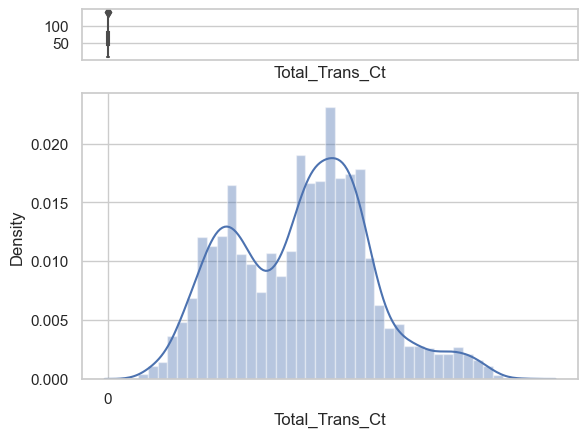

In [ ]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Total_Trans_Ct"], ax=ax_box)
sns.distplot(data["Total_Trans_Ct"], ax=ax_hist)
ax_box.set(xlabel='Total_Trans_Ct')
plt.show()

In [ ]:
#The lower quartile (Q1) is 43, meaning that 25% of individuals have a total transaction count below this value.
#The upper quartile (Q3) is 81, indicating that 75% of people have a total transaction count below this level, with very few outliers.
#The data exhibits peaks around 74 and 43, with a concentration of values in the 60-80 range

###  Observations on Total_Trans_Amt
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Amt.' Comment on what this chart indicates.

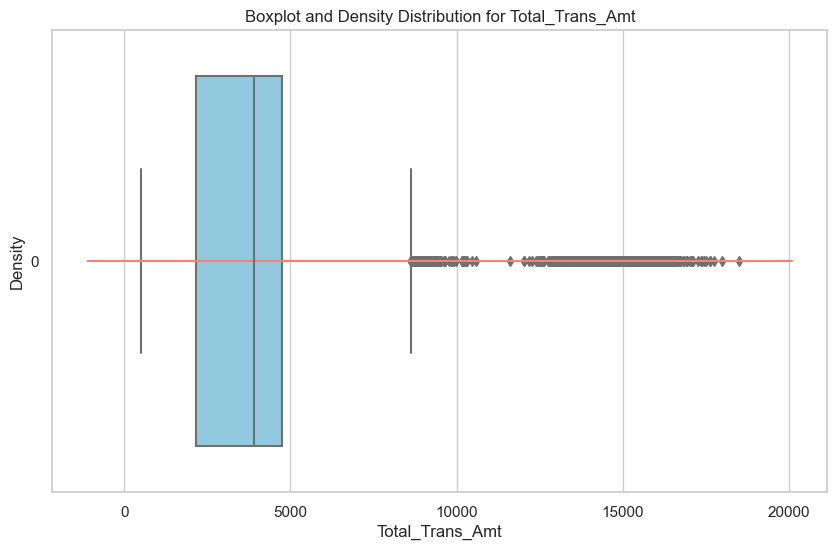

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data["Total_Trans_Amt"], color="skyblue", orient="h")
sns.kdeplot(data["Total_Trans_Amt"], color="salmon")

plt.xlabel('Total_Trans_Amt')
plt.title('Boxplot and Density Distribution for Total_Trans_Amt')

plt.show()


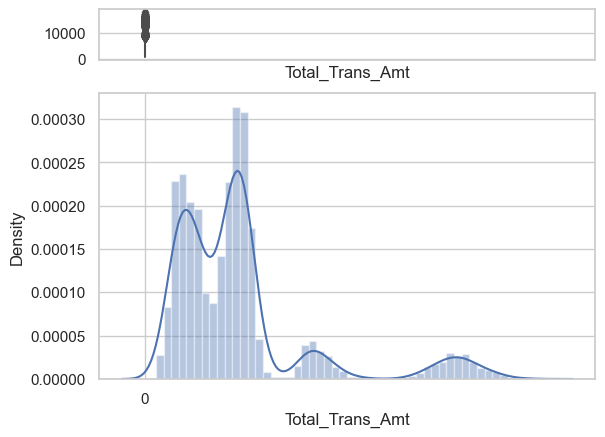

In [ ]:
# Cutting the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Adding a graph in each part
sns.boxplot(data["Total_Trans_Amt"], ax=ax_box)
sns.distplot(data["Total_Trans_Amt"], ax=ax_hist)
ax_box.set(xlabel='Total_Trans_Amt')
plt.show()

In [ ]:
#The lower quartile (Q1) is 2100, signifying that 25% of individuals have total transaction amounts below this value.
#The upper quartile (Q3) is 4900, indicating that 75% of people have total transaction amounts below this level, with numerous outliers.
#The data shows prominent peaks around 4800 and 2000, with the concentration of values falling within the 3000-5000 range

###  Correlation Matrix
Create a heatmap of the correlation matrix using spectral shading.

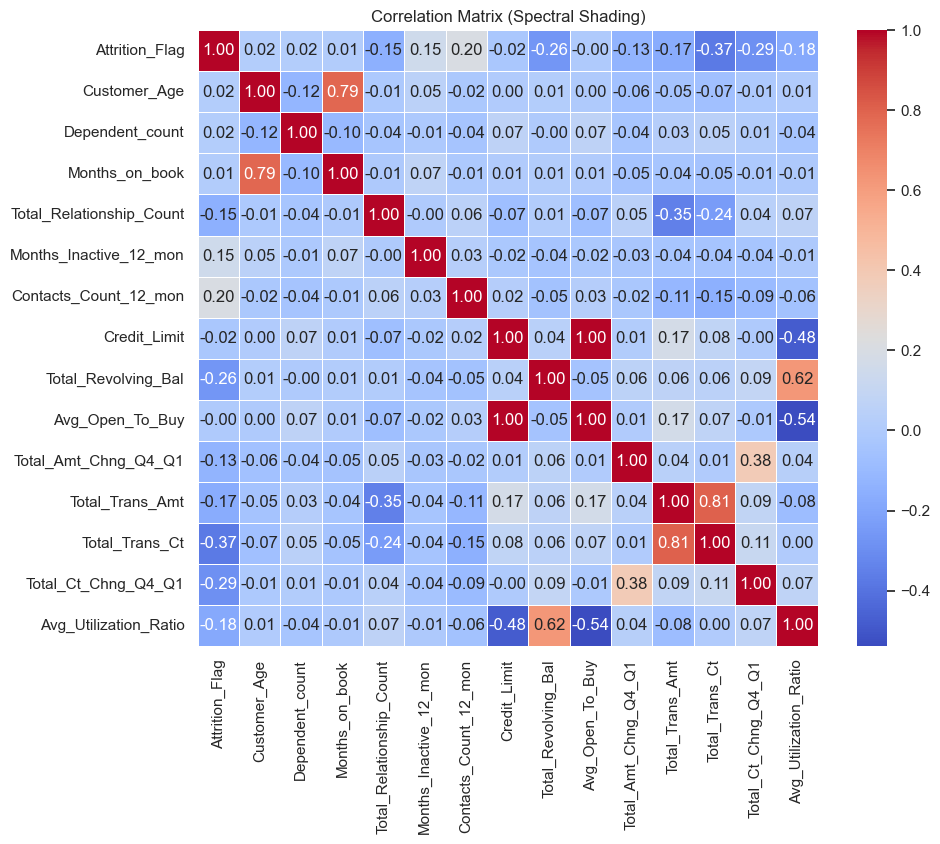

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.set(style="white")
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use a spectral colormap (cool to warm)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix (Spectral Shading)")


plt.show()


### Attrition_Flag vs Income_Category
Create barchart to visualize 'Income_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

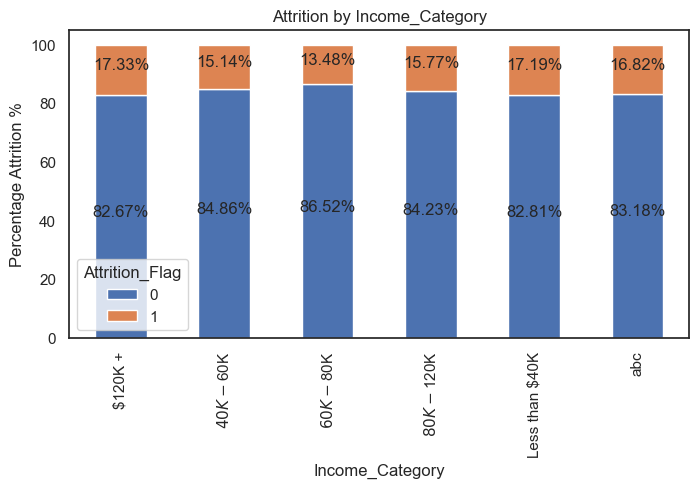

In [ ]:
cat_cols = ['Income_Category']

for i in cat_cols:
    if i != 'Attrition_Flag':
        crosstab_data = pd.crosstab(data[i], data['Attrition_Flag'], normalize='index') * 100
        ax = crosstab_data.plot(kind='bar', figsize=(8, 4), stacked=True)
        plt.ylabel('Percentage Attrition %')
        plt.xlabel(i)
        plt.title(f'Attrition by {i}')

        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center')

        plt.show()


In [ ]:
# All income categories have percentage of attrition between 13-18%

###  Attrition_Flag vs Card_Category
Create barchart to visualize 'Card_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

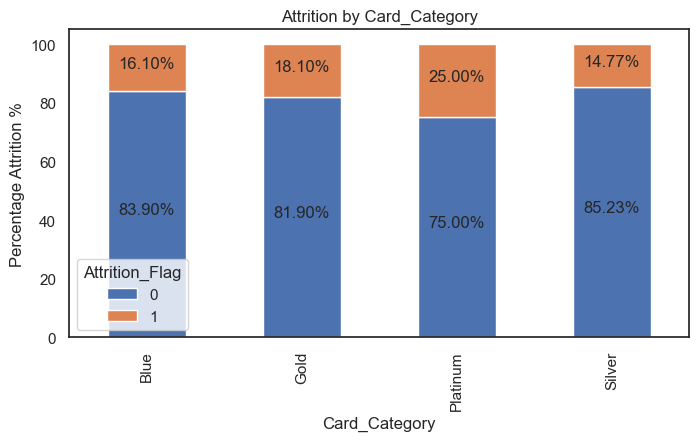

In [ ]:
cat_cols = ['Card_Category']

for i in cat_cols:
    if i != 'Attrition_Flag':
        crosstab_data = pd.crosstab(data[i], data['Attrition_Flag'], normalize='index') * 100
        ax = crosstab_data.plot(kind='bar', figsize=(8, 4), stacked=True)
        plt.ylabel('Percentage Attrition %')
        plt.xlabel(i)
        plt.title(f'Attrition by {i}')

        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center')

        plt.show()



In [ ]:
# All card categories have less than 20% attrition rate except planinum card holders whose attrition rate is 25%

### Attrition_Flag vs Months_Inactive_12_mon
Create barchart to visualize 'Months_Inactive_12_mon' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

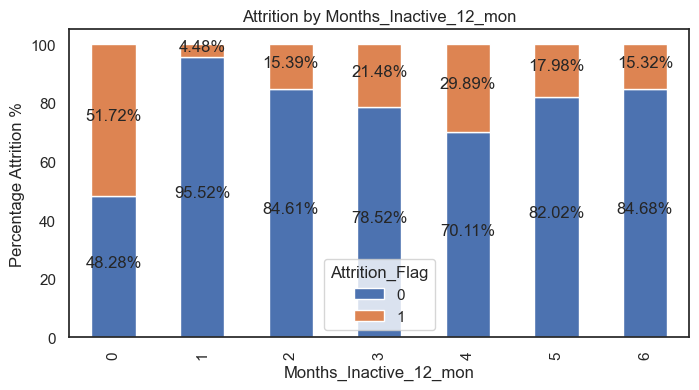

In [ ]:
cat_cols = ['Months_Inactive_12_mon']

for i in cat_cols:
    if i != 'Attrition_Flag':
        crosstab_data = pd.crosstab(data[i], data['Attrition_Flag'], normalize='index') * 100
        ax = crosstab_data.plot(kind='bar', figsize=(8, 4), stacked=True)
        plt.ylabel('Percentage Attrition %')
        plt.xlabel(i)
        plt.title(f'Attrition by {i}')

        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center')

        plt.show()

In [ ]:
#Individuals who were consistently active exhibit a significantly higher attrition rate of 50%. On the other hand, those who were inactive for one month had a lower attrition rate of less than 10%. However, individuals who remained inactive for two or more months showed relatively similar attrition rates, ranging from 20% to 25%.

## Data Preparation

### Outlier Analysis

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

### Missing Value Imputation
- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [ ]:
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Values have been replaced.

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding Categorical Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.00000,0,7985.00000,1.03200,3873,72,0.67400,0.00000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4686,50,0,36,3,3,2,5444.00000,2499,2945.00000,0.46800,4509,80,0.66700,0.45900,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1276,26,0,13,6,3,4,1643.00000,1101,542.00000,0.71300,2152,50,0.47100,0.67000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6119,65,0,55,3,3,0,2022.00000,0,2022.00000,0.57900,4623,65,0.54800,0.00000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2253,46,3,35,6,3,4,4930.00000,0,4930.00000,1.01900,3343,77,0.63800,0.00000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


## Model Building

###  Model Evaluation Criterion
What 2 cases of predictions can the model predict incorrectly? Which case is more important? What does this mean for recall and false negatives (increasing or decreasing)?

In [ ]:

In model evaluation, there are two cases of predictions that a binary classification model can make incorrectly:
1. Type 1 Error (False Positive)
2. Type 2 Error (False Negative)
In the context of model evaluation for customer churn prediction, its paramount to prioritize recall over precision.
Recall reflects the models capacity to accurately detect all instances of customer churn, even if it leads to some
false alarms. Minimizing false negatives, where actual churn cases are missed, takes precedence as it directly serves
the business objective of retaining customers. This emphasis on recall may result in an increase in false positives
(incorrectly predicting churn), but its a strategic trade-off aimed at efficiently identifying and retaining
customers at risk of churning.

### Logistic Regression
Train a logistic regression model using all predictors.

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)

### Evaluation Metrics
Create a function to calculate and print the classification report and confusion matrix.

In [ ]:
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the classification report and confusion matrix
print("Classification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039


Confusion Matrix:
 [[2460   91]
 [ 274  214]]


###  Check Performance on Training Data
Check the performance on your training data using the function you created. Comment on what your class of interest is, and how to read the confusion matrix.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def calculate_classification_metrics(model, X, y):

    # Make predictions
    y_pred = model.predict(X)

    # Calculate classification metrics
    metrics = classification_report(y, y_pred)

    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y, y_pred)

    return metrics, confusion_mat


In [ ]:
# Train your logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
training_metrics, training_confusion_matrix = calculate_classification_metrics(logistic_regression_model, X_train, y_train)

# Print the classification reports and confusion matrices for training data
print("Training Classification Report for training data:\n", training_metrics)
print("\nTraining Confusion Matrix:\n", training_confusion_matrix)


Training Classification Report for training data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088


Training Confusion Matrix:
 [[5726  223]
 [ 642  497]]


###  Check Performance on Test Data
Check the performance on your test data using the function you created.

In [ ]:
testing_metrics, testing_confusion_matrix = calculate_classification_metrics(logistic_regression_model, X_test, y_test)

print("\nTesting Classification Reportfor testing data:\n", testing_metrics)
print("\nTesting Confusion Matrix:\n", testing_confusion_matrix)


Testing Classification Reportfor testing data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039


Testing Confusion Matrix:
 [[2460   91]
 [ 274  214]]





###  Comments on Performance


In [ ]:
The logistic regression model, which predicts credit card churn, demonstrates an accuracy of 88% on both the
training and testing datasets. However, its recall, indicating the models ability to identify customers at
risk of attrition, is 44%. This suggests that the model misses over half of potential churn cases, potentially
impacting customer retention efforts. Further improvements or alternative models may be needed to enhance performance.

## Performance Evaluation

###  Evaluate Predictors
Print the coefficients of the logistic regression and comment on which variables are leading to attrition.

In [ ]:
# Accessing the coefficients
coefficients = logistic_regression_model.coef_

coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients[0]})

# Sorting the coefficients by absolute value to see which variables are leading to attrition
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(sorted_coefficients)


                          Variable  Coefficient  Abs_Coefficient
5            Contacts_Count_12_mon      0.31531          0.31531
4           Months_Inactive_12_mon      0.24919          0.24919
3         Total_Relationship_Count     -0.21321          0.21321
1                  Dependent_count      0.20002          0.20002
0                     Customer_Age      0.11755          0.11755
11                  Total_Trans_Ct     -0.09617          0.09617
2                   Months_on_book     -0.09103          0.09103
25  Income_Category_Less than $40K      0.05269          0.05269
12             Total_Ct_Chng_Q4_Q1     -0.05203          0.05203
21           Marital_Status_Single      0.04579          0.04579
14                        Gender_M     -0.03225          0.03225
20          Marital_Status_Married     -0.01957          0.01957
23     Income_Category_$60K - $80K     -0.01614          0.01614
9             Total_Amt_Chng_Q4_Q1     -0.01180          0.01180
16        Education_Level

In [ ]:
higher count of contacts made with the customer in the last 12 months, longer periods of inactivity,
and a lower total number of bank relationships are positively associated with attrition, indicating that
customers who experience more outreach, less engagement, and fewer bank relationships are more likely to churn.
Additionally, factors such as having more dependents, being younger, and falling within the "Less than $40K"
income category also contribute to a higher propensity for attrition. Conversely, variables like a higher
total transaction count, longer tenure with the bank, and certain income categories are negatively associated
with attrition, suggesting that engaged and long-term customers with specific income profiles are less likely
to attrite.

### Odds Calculation
Convert the coefficients of the logistic regression model to odds. Comment on the odds of customer attrition when it comes to contacting the bank, being inactive, and being dependent.

In [ ]:
import numpy as np

# Coefficients for the respective variables
coeff_contacts = 0.31531
coeff_inactive = 0.24919
coeff_dependent = 0.20002

# Calculate odds ratios
odds_ratio_contacts = np.exp(coeff_contacts)
odds_ratio_inactive = np.exp(coeff_inactive)
odds_ratio_dependent = np.exp(coeff_dependent)

# Printing the odds ratios
print("Odds Ratio for Contacts_Count_12_mon:", odds_ratio_contacts)
print("Odds Ratio for Months_Inactive_12_mon:", odds_ratio_inactive)
print("Odds Ratio for Dependent_count:", odds_ratio_dependent)


Odds Ratio for Contacts_Count_12_mon: 1.3706841571911572
Odds Ratio for Months_Inactive_12_mon: 1.2829857772110547
Odds Ratio for Dependent_count: 1.2214271864596151


In [ ]:
Contacts_Count_12_mon (Odds Ratio: 1.37):
    More contact with the bank within the last year is linked to a 37% higher odds of attrition.
    Frequent contact may be a risk factor.

Months_Inactive_12_mon (Odds Ratio: 1.28):
    Each additional inactive month correlates with a 28% higher odds of attrition.
    Longer inactivity suggests a greater attrition risk.

Dependent_count (Odds Ratio: 1.22):
    Each extra dependent results in a 22% higher odds of attrition.
    Having more dependents might slightly increase attrition chances.

###  Precision-Recall Curve
Create a precision-recall curve for your logistic regression model.

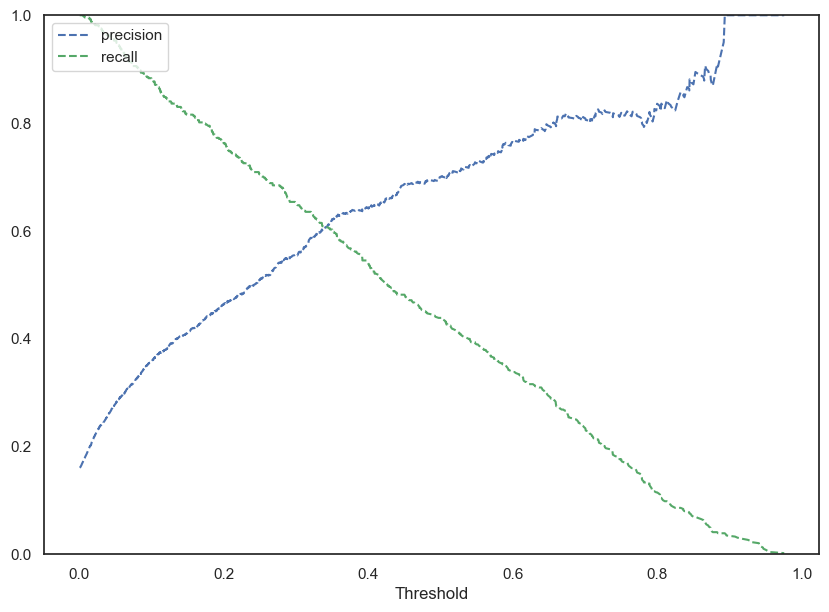

In [ ]:
y_scores_lg = logistic_regression_model.predict_proba(X_test)[:, 1]

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_scores_lg)

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()


### Threshold Calculation
Calculate the threshold where precision and recall are equal.

In [ ]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i] == recalls_lg[i]:
        print(thresholds_lg[i])


0.3403462541956873


###  Re-Evaluate Performance on Training Data
Re-evaluate your model on the training data using the identified optimal threshold. Comment on the model performance.

In [ ]:
# Calculating predicted probabilities for the training data
y_train_probabilities = logistic_regression_model.predict_proba(X_train)[:, 1]

optimal_threshold = [0.3403462541956873]  # Replace with the actual optimal threshold
y_train_predicted = (y_train_probabilities >= optimal_threshold).astype(int)

classification_rep_train = classification_report(y_train, y_train_predicted)
confusion_mat_train = confusion_matrix(y_train, y_train_predicted)

print("Classification Report (Training Data):\n", classification_rep_train)
print("\nConfusion Matrix (Training Data):\n", confusion_mat_train)


Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5949
           1       0.60      0.62      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.77      0.77      7088
weighted avg       0.87      0.87      0.87      7088


Confusion Matrix (Training Data):
 [[5487  462]
 [ 434  705]]


In [ ]:
The logistic regression model displays a reasonably good performance on the training data.
It excels in correctly identifying customers who are not likely to churn, with a high precision of 93% and a
recall of 92%. However, its performance in predicting churning customers can be enhanced, as it achieves a
lower precision of 60% and a recall of 62%. The overall accuracy stands at 87%, indicating that the
models predictions are accurate in most cases. There is room for improvement, particularly in fine-tuning
the models ability to predict customer churn accurately.

###  Re-Evaluate Performance on Test Data
Re-evaluate your model on the test data using the identified optimal threshold. Comment on the model performance. How does the model's performance compare to the model prior to adjusting the threshold?

In [ ]:
# Calculating predicted probabilities for the testing data
y_test_probabilities = logistic_regression_model.predict_proba(X_test)[:, 1]


optimal_threshold = 0.3403462541956873  # Replace with the actual optimal threshold
y_test_predicted = (y_test_probabilities >= optimal_threshold).astype(int)

classification_rep_test = classification_report(y_test, y_test_predicted)
confusion_mat_test = confusion_matrix(y_test, y_test_predicted)

print("Classification Report (Testing Data):\n", classification_rep_test)
print("\nConfusion Matrix (Testing Data):\n", confusion_mat_test)


Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2551
           1       0.61      0.61      0.61       488

    accuracy                           0.87      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.87      0.87      0.87      3039


Confusion Matrix (Testing Data):
 [[2359  192]
 [ 192  296]]


In [ ]:
The logistic regression model demonstrates a reasonably good performance on the testing data as well.
It excels in correctly identifying customers who are not likely to churn, with a high precision of 92%
and a recall of 92%. However, its performance in predicting churning customers can be enhanced, as it achieves a
lower precision of 61% and a recall of 61%. The overall accuracy stands at 87%, indicating that the
models predictions are accurate in most cases. Similar to the training data, there is room for improvement,
particularly in fine-tuning the models ability to predict customer churn accurately.